Klasyfikacja na podstawie melspektrogramów

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import os
import importlib

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Input, Layer
from keras.optimizers import Adam
from keras.src.applications.mobilenet_v2 import MobileNetV2
from keras.utils import to_categorical
from keras.applications import ResNet50, VGG16
from keras.applications.resnet50 import preprocess_input
from keras.models import Model, Sequential
from keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import music_tools

In [ ]:
song_path = "resources/turkish-music-emotion-dataset"

In [ ]:
data = []

path_happy = os.path.join(song_path, 'happy')
for file in os.listdir(path_happy):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_happy, filename),
        'emotion': 'happy',
    })

path_angry = os.path.join(song_path, 'angry')
for file in os.listdir(path_angry):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_angry, filename),
        'emotion': 'angry',
    })

path_sad = os.path.join(song_path, 'sad')
for file in os.listdir(path_sad):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_sad, filename),
        'emotion': 'sad',
    })

path_relax = os.path.join(song_path, 'relax')
for file in os.listdir(path_relax):
    filename = os.fsdecode(file)
    data.append({
        'path': os.path.join(path_relax, filename),
        'emotion': 'relax',
    })

df_turkish = pd.DataFrame.from_records(data)

In [15]:
# specs = music_tools.extract_melspectrogram_segments("C:\\Users\\Gabi\\.cache\\kagglehub\\datasets\\blaler\\turkish-music-emotion-dataset\\versions\\3\\sad\\eledim_eledim_eda_karaytug.mp3", segment_duration=5)
# X_song = np.array(specs)
# X_song_rgb = music_tools.melspectrogram_to_rgb(X_song)
#
# preds_proba = model.predict(X_song_rgb)
# preds_class = np.argmax(preds_proba, axis=1)
#
# majority_class = np.bincount(preds_class).argmax()
#
# avg_proba = np.mean(preds_proba, axis=0)
# avg_class = np.argmax(avg_proba)
#
# final_class_majority = le.inverse_transform([majority_class])[0]
# final_class_avg = le.inverse_transform([avg_class])[0]
#
# print(f"majority_vote: {final_class_majority}")
# print(f"average_proba: {final_class_avg}")
# print(f"pred_per_segment: {le.inverse_transform(preds_class)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
majority_vote: sad
average_proba: sad
pred_per_segment: ['sad' 'angry' 'sad' 'sad' 'sad' 'relax']


Podział na zbiór uczący i testujący wg id utworów

In [4]:
train_df, temp_df, _, _ = train_test_split(df_turkish, df_turkish['emotion'], stratify=df_turkish['emotion'], test_size=0.3, random_state=42)
test_df, val_df, _, _ = train_test_split(temp_df, temp_df['emotion'], stratify=temp_df['emotion'], test_size=0.5, random_state=42)
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(280, 2)
(60, 2)
(60, 2)


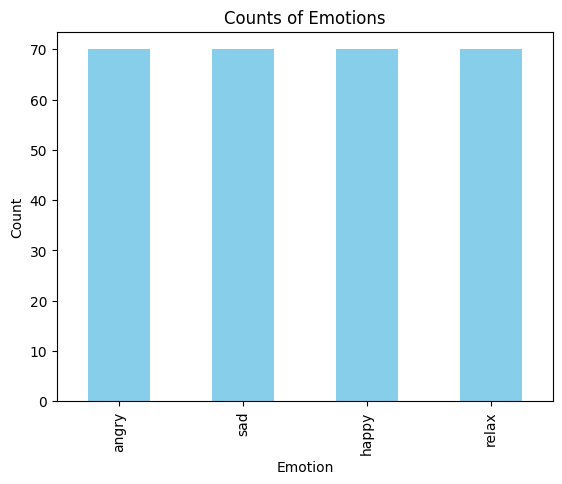

In [5]:
music_tools.show_class_proportions(train_df.emotion)

In [5]:
importlib.reload(music_tools)
X_train, y_train, X_test, y_test, X_val, y_val = [], [], [], [], [], []

i = 1
for _, row in train_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_train.extend(specs)
    y_train.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in test_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_test.extend(specs)
    y_test.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in val_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_val.extend(specs)
    y_val.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [6]:
le_train = LabelEncoder()
y_train_en = le_train.fit_transform(y_train)
y_train_cnn = to_categorical(y_train_en)

le_test = LabelEncoder()
y_test_en = le_test.fit_transform(y_test)
y_test_cnn = to_categorical(y_test_en)

le_val = LabelEncoder()
y_val_en = le_val.fit_transform(y_val)
y_val_cnn = to_categorical(y_val_en)

In [16]:
input_shape = X_train.shape[1:]
num_classes = y_train_cnn.shape[1]

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(1e-5)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(1e-5)),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 214, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 107, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 105, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 99840)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,779,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,798,980 (48.82 MB)

 Trainable params: 12,798,980 (48.82 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train,
    y_train_cnn,
    validation_data=(X_val, y_val_cnn),
    epochs=40,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
    ],
    batch_size=32)

Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.2673 - loss: 1.4063 - val_accuracy: 0.4624 - val_loss: 1.2451
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.4004 - loss: 1.2463 - val_accuracy: 0.5237 - val_loss: 1.0924
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.4963 - loss: 1.1127 - val_accuracy: 0.5320 - val_loss: 1.0511
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.5182 - loss: 1.0794 - val_accuracy: 0.5543 - val_loss: 0.9724
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.5752 - loss: 1.0233 - val_accuracy: 0.5850 - val_loss: 0.9412
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.5769 - loss: 1.0172 - val_accuracy: 0.6212 - val_loss: 0.8982
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.5775 - loss: 0.9496 - val_accuracy: 0.6407 - val_loss: 0.8706
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.6369 - loss: 0.9098 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
Accuracy: 0.744
Precision: 0.744
Recall: 0.744
F1-score: 0.744
              precision    recall  f1-score   support

       angry       0.78      0.84      0.81        89
       happy       0.80      0.78      0.79        90
       relax       0.68      0.67      0.67        87
         sad       0.70      0.69      0.70        90

    accuracy                           0.74       356
   macro avg       0.74      0.74      0.74       356
weighted avg       0.74      0.74      0.74       356



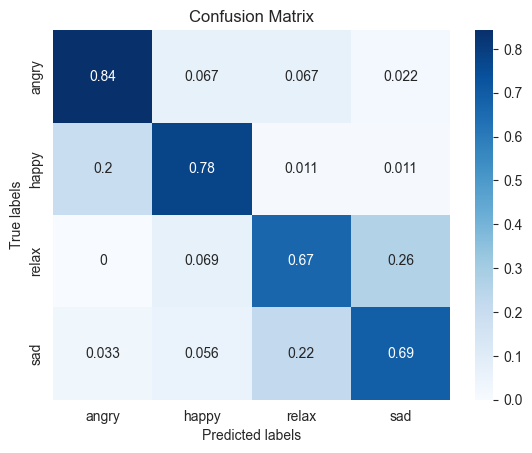

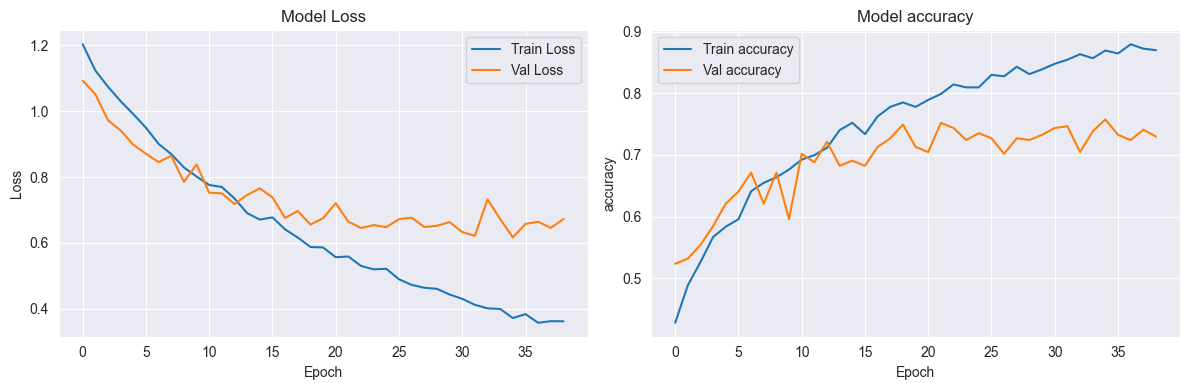

In [18]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

Augmentacja plików audio

In [56]:
input_shape = X_train.shape[1:]
num_classes = y_train_cnn.shape[1]

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(1e-5)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(1e-5)),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train_cnn,
    validation_data=(X_val, y_val_cnn),
    epochs=40,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
    ],
    batch_size=32)

C:\Users\Gabi\PycharmProjects\Music-Emotion-Recognition\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - accuracy: 0.3650 - loss: 1.3198 - val_accuracy: 0.5432 - val_loss: 1.0202
Epoch 2/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.5327 - loss: 1.0771 - val_accuracy: 0.6490 - val_loss: 0.9174
Epoch 3/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - accuracy: 0.6182 - loss: 0.9391 - val_accuracy: 0.7298 - val_loss: 0.7974
Epoch 4/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - accuracy: 0.6863 - loss: 0.8127 - val_accuracy: 0.6128 - val_loss: 0.8807
Epoch 5/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.7399 - loss: 0.7012 - val_accuracy: 0.6602 - val_loss: 0.8232
Epoch 6/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.7578 - loss: 0.6719 - val_accuracy: 0.5877 - val_loss: 0.8416
Epoch 7/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.8062 - loss: 0.5824 - val_accuracy: 0.7298 - val_loss: 0.6463
Epoch 8/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.8070 - loss: 0.5303 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Accuracy: 0.767
Precision: 0.767
Recall: 0.767
F1-score: 0.765
              precision    recall  f1-score   support

       angry       0.82      0.84      0.83        89
       happy       0.79      0.84      0.82        90
       relax       0.76      0.62      0.68        87
         sad       0.69      0.76      0.72        90

    accuracy                           0.77       356
   macro avg       0.77      0.77      0.76       356
weighted avg       0.77      0.77      0.76       356



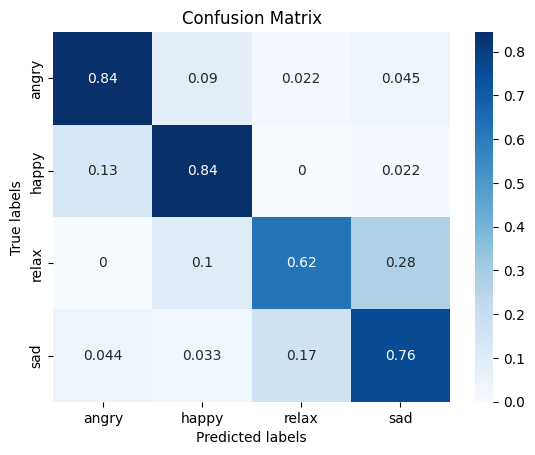

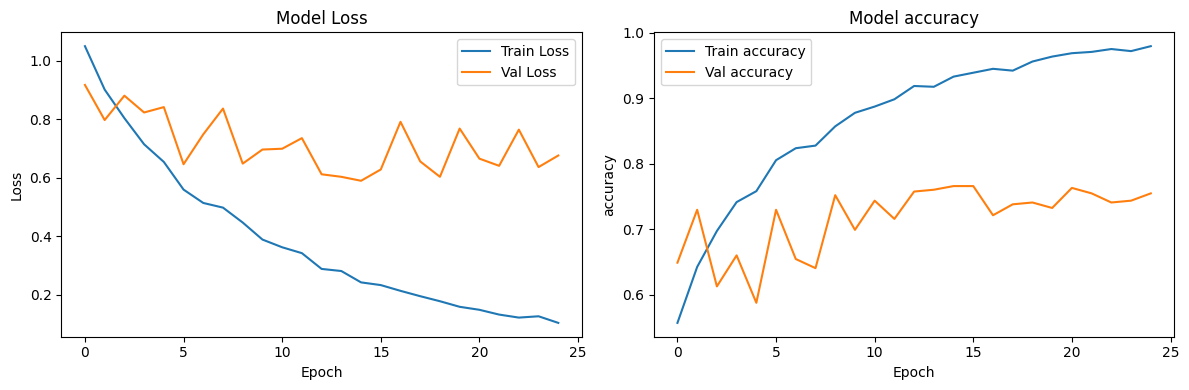

In [57]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [7]:
X_train_rgb = music_tools.melspectrogram_to_rgb(X_train)
X_train_rgb = preprocess_input(X_train_rgb)

X_test_rgb = music_tools.melspectrogram_to_rgb(X_test)
X_test_rgb = preprocess_input(X_test_rgb)

X_val_rgb = music_tools.melspectrogram_to_rgb(X_val)
X_val_rgb = preprocess_input(X_val_rgb)

ResNet50

Po pierwszym uczeniu brak przeuczenia, po fine-tuningu lekkie przeuczenie i brak poprawy wyników

In [22]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
early_stop = EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.3711 - loss: 1.5870 - val_accuracy: 0.7493 - val_loss: 0.7056 - learning_rate: 1.0000e-04
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6422 - loss: 0.8907 - val_accuracy: 0.8022 - val_loss: 0.5649 - learning_rate: 1.0000e-04
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7040 - loss: 0.7023 - val_accuracy: 0.8245 - val_loss: 0.4901 - learning_rate: 1.0000e-04
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7259 - loss: 0.6687 - val_accuracy: 0.8245 - val_loss: 0.4564 - learning_rate: 1.0000e-04
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7565 - loss: 0.6018 - val_accuracy: 0.8412 - val_loss: 0.4351 - learning_rate: 1.0000e-04
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7931 - loss: 0.5272 - val_accuracy: 0.8635 - val_loss: 0.4085 - learning_rate: 1.0000e-04
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7817 - loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Accuracy: 0.829
Precision: 0.839
Recall: 0.829
F1-score: 0.829
              precision    recall  f1-score   support

       angry       0.95      0.89      0.92        89
       happy       0.89      0.91      0.90        90
       relax       0.83      0.67      0.74        87
         sad       0.68      0.84      0.76        90

    accuracy                           0.83       356
   macro avg       0.84      0.83      0.83       356
weighted avg       0.84      0.83      0.83       356



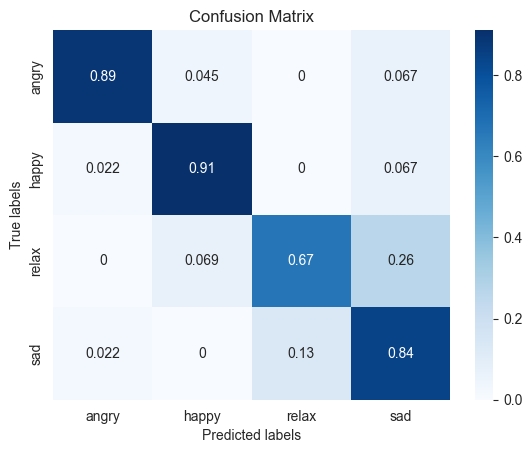

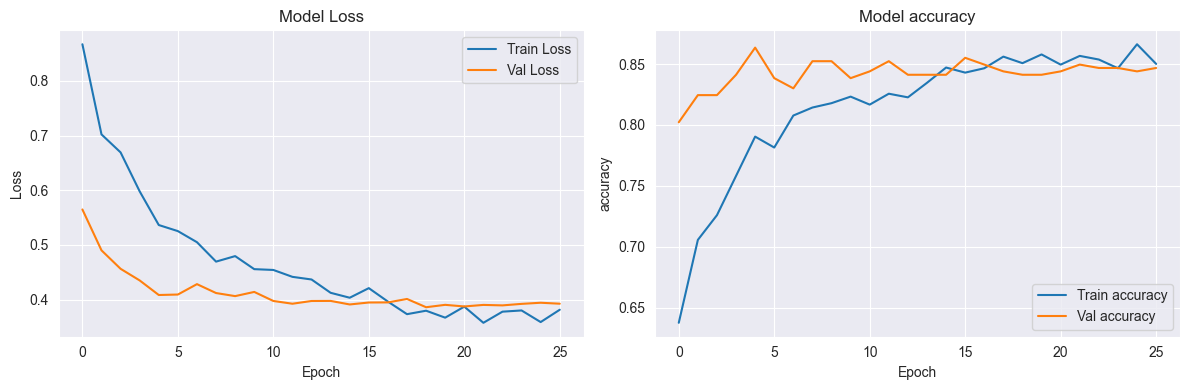

In [25]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [26]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
early_stop_ft = EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr_ft = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop_ft, reduce_lr_ft]
)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8258 - loss: 0.4244 - val_accuracy: 0.8106 - val_loss: 0.4616 - learning_rate: 1.0000e-05
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8692 - loss: 0.3486 - val_accuracy: 0.8301 - val_loss: 0.4394 - learning_rate: 1.0000e-05
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8880 - loss: 0.2901 - val_accuracy: 0.8329 - val_loss: 0.4302 - learning_rate: 1.0000e-05
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9183 - loss: 0.2360 - val_accuracy: 0.8357 - val_loss: 0.4402 - learning_rate: 1.0000e-05
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9337 - loss: 0.1937
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
53/53 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9337 - loss: 0.1937 - val_accuracy: 0.8468 - val_loss: 0.4441 - learning_rate: 1.0000e-05
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9460 - loss:

12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Accuracy: 0.823
Precision: 0.844
Recall: 0.823
F1-score: 0.821
              precision    recall  f1-score   support

       angry       0.96      0.89      0.92        89
       happy       0.87      0.92      0.90        90
       relax       0.88      0.59      0.70        87
         sad       0.66      0.89      0.76        90

    accuracy                           0.82       356
   macro avg       0.84      0.82      0.82       356
weighted avg       0.84      0.82      0.82       356



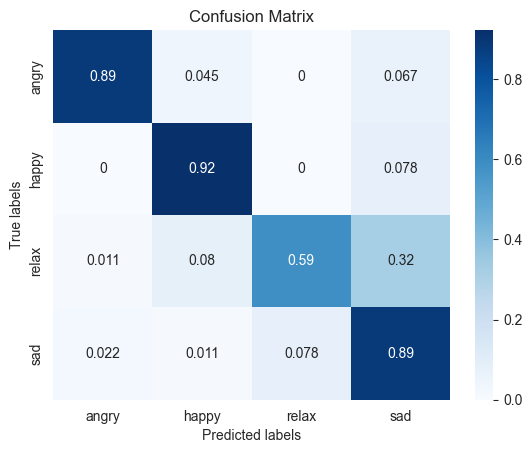

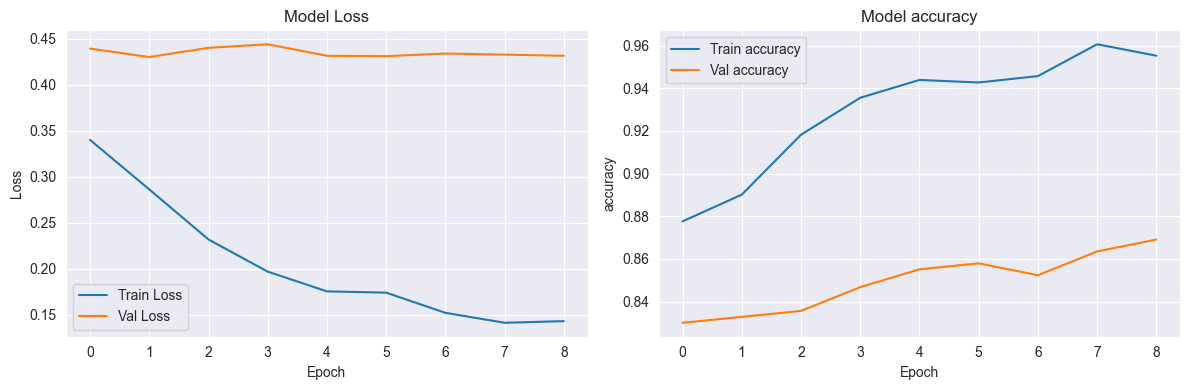

In [28]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

Raczej bardziej zrównoważony model

In [47]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4156 - loss: 1.4494 - val_accuracy: 0.7799 - val_loss: 0.6503 - learning_rate: 1.0000e-04
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.6533 - loss: 0.8200 - val_accuracy: 0.8134 - val_loss: 0.5343 - learning_rate: 1.0000e-04
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7556 - loss: 0.6270 - val_accuracy: 0.8301 - val_loss: 0.4529 - learning_rate: 1.0000e-04
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7648 - loss: 0.5692 - val_accuracy: 0.8273 - val_loss: 0.4440 - learning_rate: 1.0000e-04
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8139 - loss: 0.5015 - val_accuracy: 0.8384 - val_loss: 0.4080 - learning_rate: 1.0000e-04
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8403 - loss: 0.4379 - val_accuracy: 0.8301 - val_loss: 0.4150 - learning_rate: 1.0000e-04
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.8469 

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Accuracy: 0.823
Precision: 0.829
Recall: 0.823
F1-score: 0.824
              precision    recall  f1-score   support

       angry       0.92      0.91      0.92        89
       happy       0.92      0.91      0.92        90
       relax       0.80      0.68      0.73        87
         sad       0.68      0.79      0.73        90

    accuracy                           0.82       356
   macro avg       0.83      0.82      0.82       356
weighted avg       0.83      0.82      0.82       356



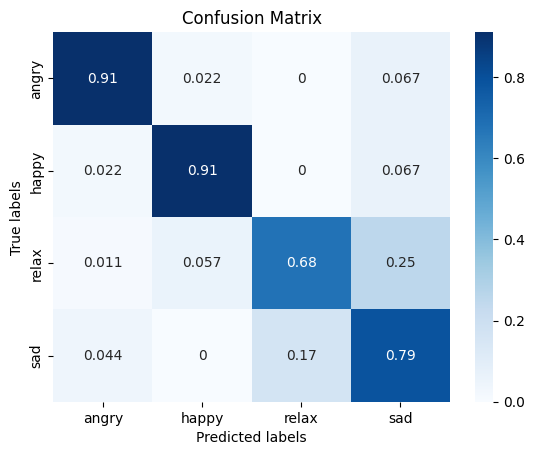

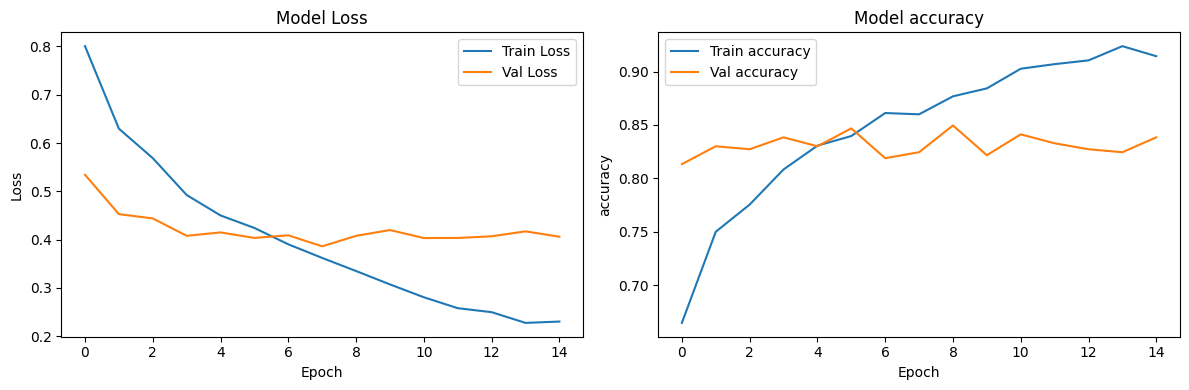

In [48]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [49]:
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-5:]:
# for layer in base_model.layers[-10:]:
    layer.trainable = True

model = Model(inputs=base_model.input, outputs=output, name='finetuned')

model.compile(
    # optimizer=Adam(5e-5),
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Trainable layers:", np.sum([layer.trainable for layer in model.layers]))

early_stop_ft = EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr_ft = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-7, verbose=1)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop_ft, reduce_lr_ft]
)

Trainable layers: 11
Epoch 1/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 134s 800ms/step - accuracy: 0.8822 - loss: 0.3359 - val_accuracy: 0.8245 - val_loss: 0.3991 - learning_rate: 1.0000e-05
Epoch 2/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 128s 803ms/step - accuracy: 0.8923 - loss: 0.3027 - val_accuracy: 0.8357 - val_loss: 0.3983 - learning_rate: 1.0000e-05
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 127s 795ms/step - accuracy: 0.9071 - loss: 0.2644 - val_accuracy: 0.8357 - val_loss: 0.4030 - learning_rate: 1.0000e-05
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.9016 - loss: 0.2743
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.
160/160 ━━━━━━━━━━━━━━━━━━━━ 128s 800ms/step - accuracy: 0.9016 - loss: 0.2743 - val_accuracy: 0.8301 - val_loss: 0.4106 - learning_rate: 1.0000e-05
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 128s 801ms/step - accuracy: 0.9033 - loss: 0.2610 - val_accuracy: 0.8301 - val_loss: 0.4102 - learning_rate: 3.0000e-06
Epoch 6/15
160/160 ━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Accuracy: 0.826
Precision: 0.829
Recall: 0.826
F1-score: 0.825
              precision    recall  f1-score   support

       angry       0.90      0.91      0.91        89
       happy       0.91      0.92      0.92        90
       relax       0.81      0.68      0.74        87
         sad       0.70      0.79      0.74        90

    accuracy                           0.83       356
   macro avg       0.83      0.82      0.82       356
weighted avg       0.83      0.83      0.83       356



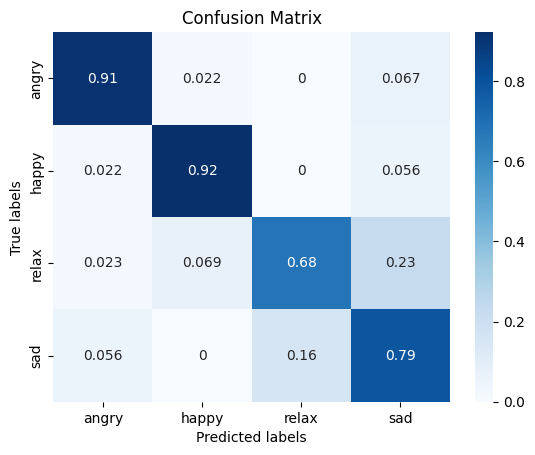

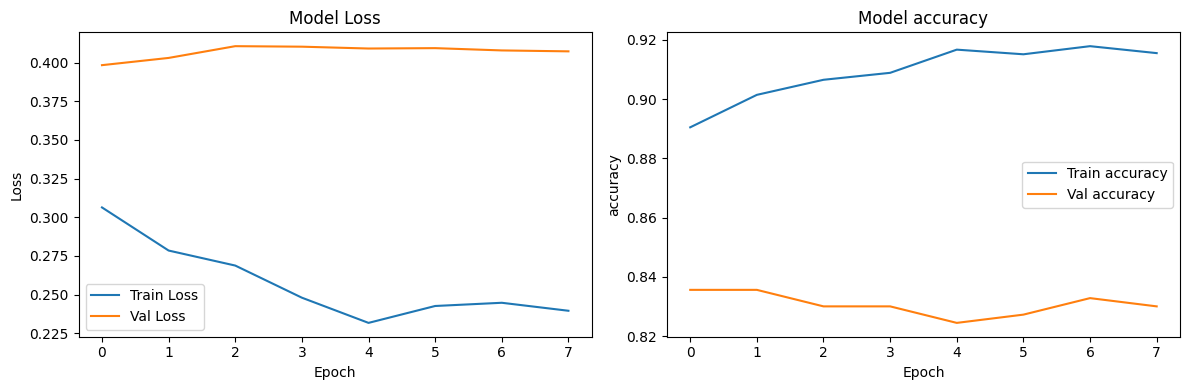

In [50]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

Augmentacja plików audio

In [62]:
X_train_rgb.shape

(2515, 224, 224, 3)

In [63]:
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.3727 - loss: 1.5573 - val_accuracy: 0.7827 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 2/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.6463 - loss: 0.8551 - val_accuracy: 0.8329 - val_loss: 0.5683 - learning_rate: 1.0000e-04
Epoch 3/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7271 - loss: 0.6844 - val_accuracy: 0.8106 - val_loss: 0.4885 - learning_rate: 1.0000e-04
Epoch 4/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7775 - loss: 0.5696 - val_accuracy: 0.8412 - val_loss: 0.4441 - learning_rate: 1.0000e-04
Epoch 5/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8062 - loss: 0.5108 - val_accuracy: 0.8468 - val_loss: 0.4177 - learning_rate: 1.0000e-04
Epoch 6/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8335 - loss: 0.4538 - val_accuracy: 0.8579 - val_loss: 0.4233 - learning_rate: 1.0000e-04
Epoch 7/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8502 

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Accuracy: 0.826
Precision: 0.827
Recall: 0.826
F1-score: 0.825
              precision    recall  f1-score   support

       angry       0.93      0.91      0.92        89
       happy       0.87      0.92      0.90        90
       relax       0.79      0.68      0.73        87
         sad       0.72      0.79      0.75        90

    accuracy                           0.83       356
   macro avg       0.83      0.82      0.82       356
weighted avg       0.83      0.83      0.82       356



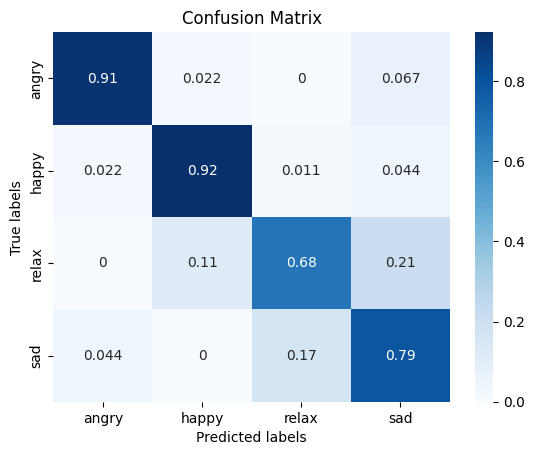

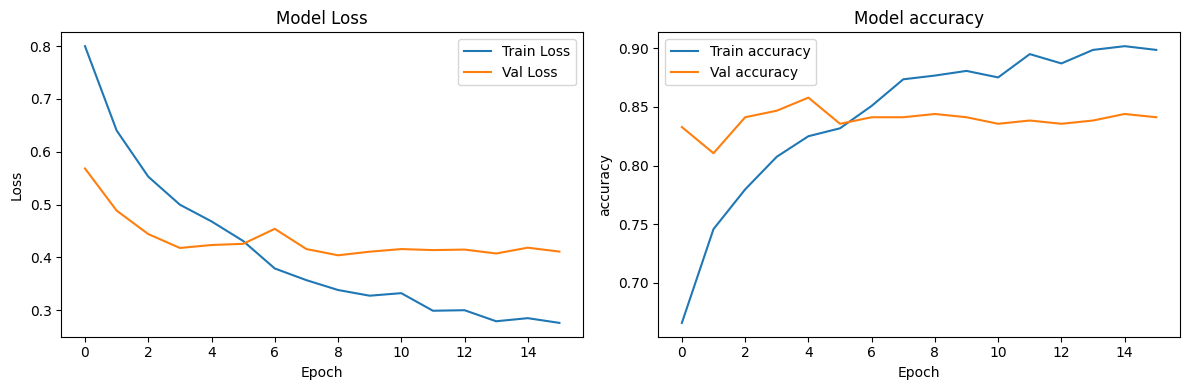

In [64]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [65]:
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

model = Model(inputs=base_model.input, outputs=output, name='finetuned')

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Trainable layers:", np.sum([layer.trainable for layer in model.layers]))

early_stop_ft = EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr_ft = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-7, verbose=1)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop_ft, reduce_lr_ft]
)

Trainable layers: 11
Epoch 1/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8763 - loss: 0.3416 - val_accuracy: 0.8357 - val_loss: 0.4288 - learning_rate: 1.0000e-05
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.8978 - loss: 0.2818 - val_accuracy: 0.8357 - val_loss: 0.4285 - learning_rate: 1.0000e-05
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 136s 864ms/step - accuracy: 0.8946 - loss: 0.3018 - val_accuracy: 0.8440 - val_loss: 0.4226 - learning_rate: 1.0000e-05
Epoch 4/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 119s 752ms/step - accuracy: 0.9024 - loss: 0.2666 - val_accuracy: 0.8329 - val_loss: 0.4275 - learning_rate: 1.0000e-05
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 124s 784ms/step - accuracy: 0.9025 - loss: 0.2754 - val_accuracy: 0.8384 - val_loss: 0.4186 - learning_rate: 1.0000e-05
Epoch 6/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 118s 748ms/step - accuracy: 0.9176 - loss: 0.2547 - val_accuracy: 0.8357 - val_loss: 0.4264 - learning_rate: 1.0000e-05
Epoch 7/15
158/158 ━━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 985ms/step
Accuracy: 0.837
Precision: 0.839
Recall: 0.837
F1-score: 0.837
              precision    recall  f1-score   support

       angry       0.95      0.91      0.93        89
       happy       0.88      0.93      0.91        90
       relax       0.79      0.70      0.74        87
         sad       0.73      0.80      0.76        90

    accuracy                           0.84       356
   macro avg       0.84      0.84      0.84       356
weighted avg       0.84      0.84      0.84       356



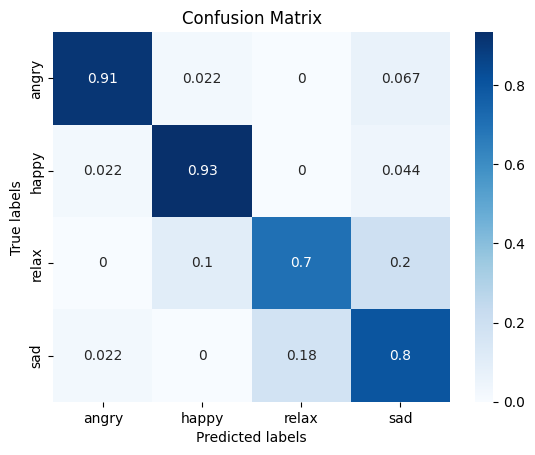

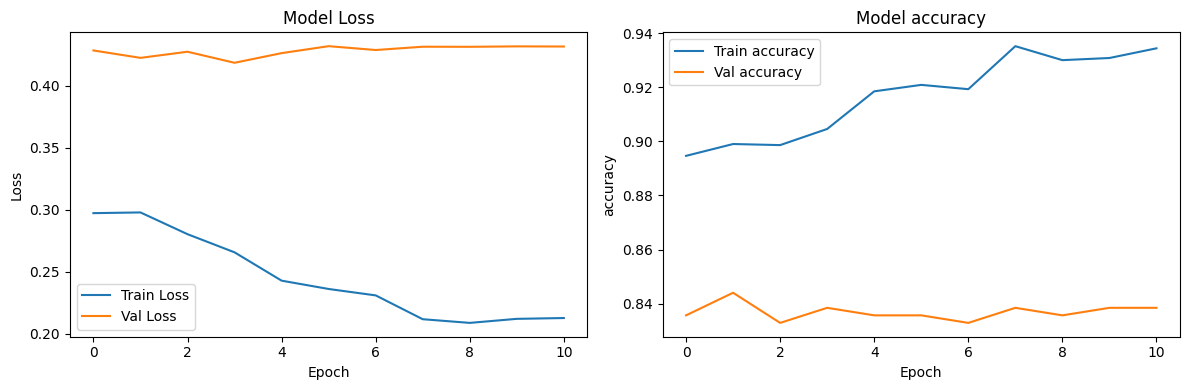

In [66]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

MobileNetV2

In [51]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=7, restore_best_weights=True)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

C:\Users\Gabi\AppData\Local\Temp\ipykernel_18652\2159842857.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 322ms/step - accuracy: 0.3785 - loss: 1.3675 - val_accuracy: 0.6267 - val_loss: 0.9378
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 297ms/step - accuracy: 0.6261 - loss: 0.9018 - val_accuracy: 0.6323 - val_loss: 0.8520
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 308ms/step - accuracy: 0.7016 - loss: 0.7453 - val_accuracy: 0.6713 - val_loss: 0.7764
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 294ms/step - accuracy: 0.7255 - loss: 0.7021 - val_accuracy: 0.7019 - val_loss: 0.7312
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - accuracy: 0.7798 - loss: 0.6006 - val_accuracy: 0.7159 - val_loss: 0.7090
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 297ms/step - accuracy: 0.8069 - loss: 0.5232 - val_accuracy: 0.7159 - val_loss: 0.6822
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.8252 - loss: 0.4774 - val_accuracy: 0.7270 - val_loss: 0.6511
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 314ms/step - accuracy: 0.8235 - loss: 0.4702 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step
Accuracy: 0.750
Precision: 0.768
Recall: 0.750
F1-score: 0.749
              precision    recall  f1-score   support

       angry       0.90      0.72      0.80        89
       happy       0.78      0.89      0.83        90
       relax       0.77      0.59      0.67        87
         sad       0.62      0.80      0.70        90

    accuracy                           0.75       356
   macro avg       0.77      0.75      0.75       356
weighted avg       0.77      0.75      0.75       356



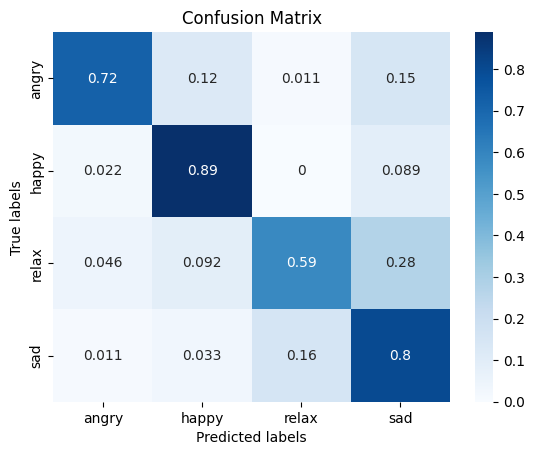

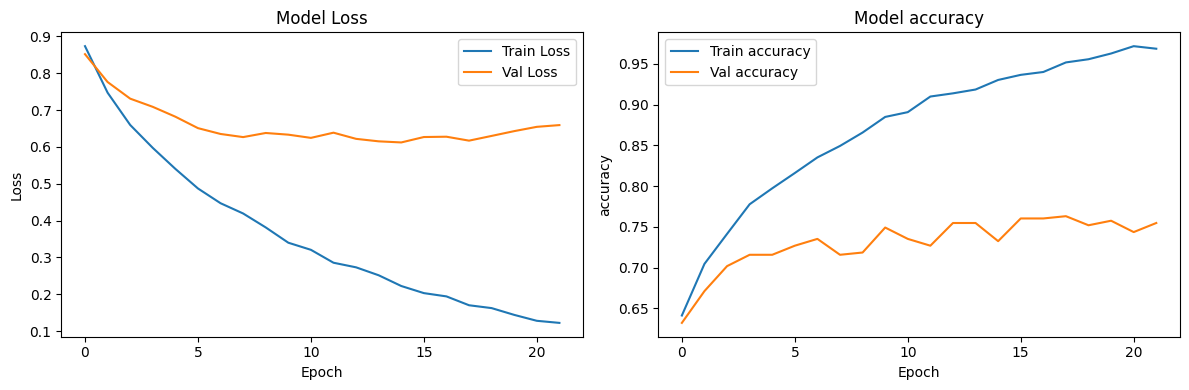

In [52]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [53]:
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

model = Model(inputs=base_model.input, outputs=output, name='finetuned')

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop_ft = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop_ft]
)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 368ms/step - accuracy: 0.5849 - loss: 1.0884 - val_accuracy: 0.7159 - val_loss: 0.7231
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.7180 - loss: 0.7116 - val_accuracy: 0.7131 - val_loss: 0.7546
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 350ms/step - accuracy: 0.7809 - loss: 0.5786 - val_accuracy: 0.7075 - val_loss: 0.7697
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 362ms/step - accuracy: 0.7991 - loss: 0.5275 - val_accuracy: 0.7019 - val_loss: 0.7641
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 358ms/step - accuracy: 0.8278 - loss: 0.4586 - val_accuracy: 0.7075 - val_loss: 0.7598
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 351ms/step - accuracy: 0.8319 - loss: 0.4163 - val_accuracy: 0.7131 - val_loss: 0.7637


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step
Accuracy: 0.753
Precision: 0.783
Recall: 0.753
F1-score: 0.739
              precision    recall  f1-score   support

       angry       0.82      0.87      0.84        89
       happy       0.83      0.86      0.84        90
       relax       0.87      0.39      0.54        87
         sad       0.62      0.89      0.73        90

    accuracy                           0.75       356
   macro avg       0.78      0.75      0.74       356
weighted avg       0.78      0.75      0.74       356



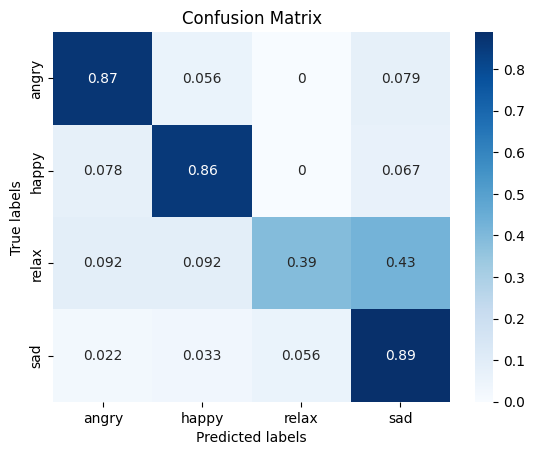

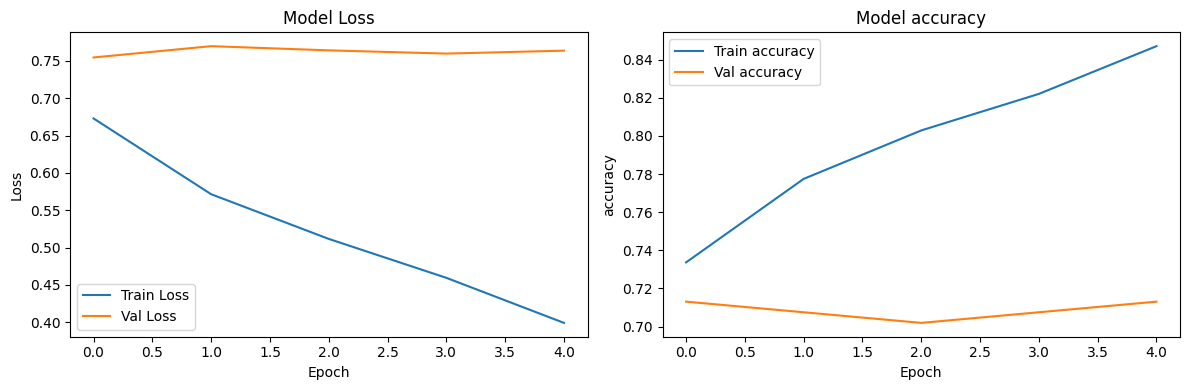

In [54]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

Augmentacja audio

In [67]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=7, restore_best_weights=True)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

C:\Users\Gabi\AppData\Local\Temp\ipykernel_18652\2159842857.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


Epoch 1/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 419ms/step - accuracy: 0.3893 - loss: 1.3184 - val_accuracy: 0.6490 - val_loss: 0.9029
Epoch 2/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 335ms/step - accuracy: 0.6328 - loss: 0.8560 - val_accuracy: 0.6741 - val_loss: 0.7945
Epoch 3/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 342ms/step - accuracy: 0.7106 - loss: 0.7335 - val_accuracy: 0.6964 - val_loss: 0.7447
Epoch 4/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 336ms/step - accuracy: 0.7334 - loss: 0.6587 - val_accuracy: 0.7214 - val_loss: 0.7083
Epoch 5/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 379ms/step - accuracy: 0.7598 - loss: 0.6026 - val_accuracy: 0.7047 - val_loss: 0.7190
Epoch 6/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 371ms/step - accuracy: 0.7928 - loss: 0.5644 - val_accuracy: 0.7326 - val_loss: 0.6675
Epoch 7/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 467ms/step - accuracy: 0.8132 - loss: 0.5112 - val_accuracy: 0.7577 - val_loss: 0.6535
Epoch 8/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 344ms/step - accuracy: 0.8148 - loss: 0.4915 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step
Accuracy: 0.764
Precision: 0.766
Recall: 0.764
F1-score: 0.763
              precision    recall  f1-score   support

       angry       0.82      0.79      0.80        89
       happy       0.80      0.86      0.83        90
       relax       0.75      0.63      0.69        87
         sad       0.69      0.78      0.73        90

    accuracy                           0.76       356
   macro avg       0.77      0.76      0.76       356
weighted avg       0.77      0.76      0.76       356



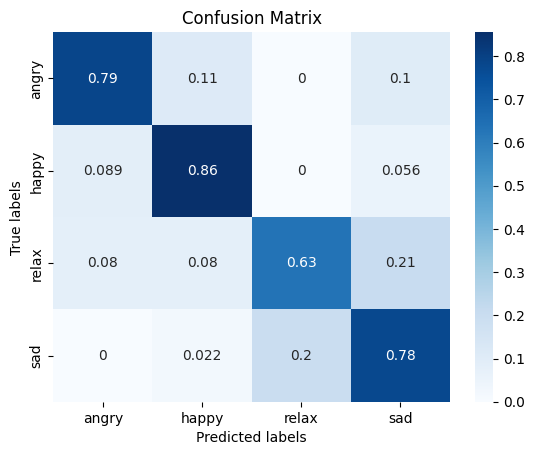

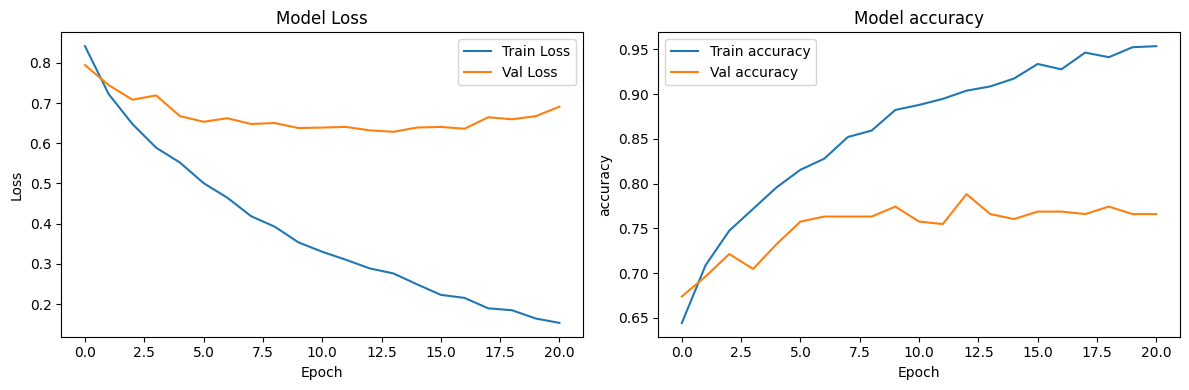

In [68]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [69]:
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

model = Model(inputs=base_model.input, outputs=output, name='finetuned')

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop_ft = EarlyStopping(patience=4, restore_best_weights=True)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop_ft]
)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 416ms/step - accuracy: 0.5904 - loss: 1.2391 - val_accuracy: 0.7493 - val_loss: 0.6731
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 370ms/step - accuracy: 0.7052 - loss: 0.7805 - val_accuracy: 0.7632 - val_loss: 0.6637
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 379ms/step - accuracy: 0.7453 - loss: 0.6257 - val_accuracy: 0.7577 - val_loss: 0.6689
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 372ms/step - accuracy: 0.7882 - loss: 0.5649 - val_accuracy: 0.7577 - val_loss: 0.6769
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 381ms/step - accuracy: 0.7957 - loss: 0.5605 - val_accuracy: 0.7549 - val_loss: 0.6954
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 380ms/step - accuracy: 0.8427 - loss: 0.4201 - val_accuracy: 0.7577 - val_loss: 0.6946


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step
Accuracy: 0.767
Precision: 0.779
Recall: 0.767
F1-score: 0.763
              precision    recall  f1-score   support

       angry       0.87      0.73      0.79        89
       happy       0.76      0.90      0.82        90
       relax       0.81      0.57      0.67        87
         sad       0.69      0.86      0.76        90

    accuracy                           0.77       356
   macro avg       0.78      0.77      0.76       356
weighted avg       0.78      0.77      0.76       356



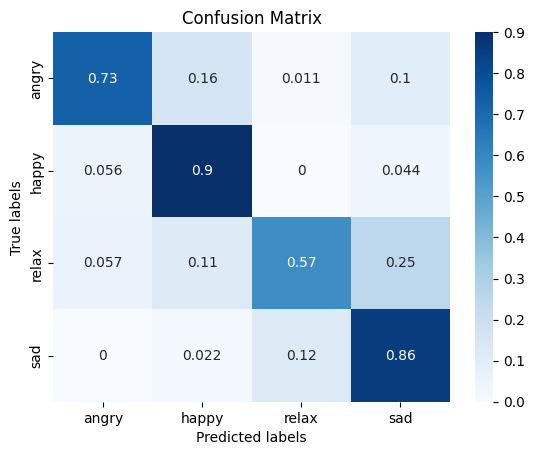

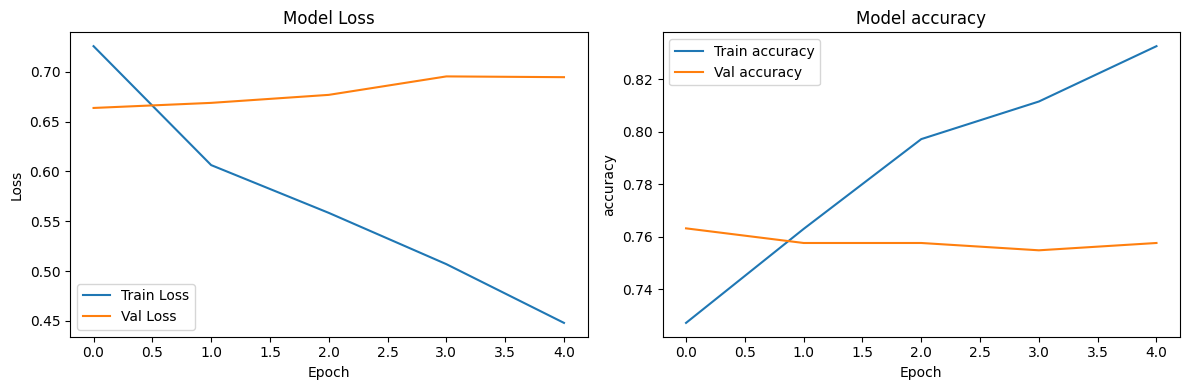

In [70]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

VGG16

Najlepszy uzyskany model

In [8]:
vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=25,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True),
    ]
)

Epoch 1/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.3087 - loss: 1.9470 - val_accuracy: 0.4986 - val_loss: 1.1410
Epoch 2/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 241s 5s/step - accuracy: 0.5388 - loss: 1.1918 - val_accuracy: 0.6825 - val_loss: 0.8033
Epoch 3/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.6583 - loss: 0.9152 - val_accuracy: 0.7382 - val_loss: 0.6778
Epoch 4/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.6504 - loss: 0.9111 - val_accuracy: 0.7744 - val_loss: 0.6136
Epoch 5/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 246s 5s/step - accuracy: 0.7256 - loss: 0.7464 - val_accuracy: 0.7688 - val_loss: 0.5900
Epoch 6/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.7581 - loss: 0.6641 - val_accuracy: 0.7827 - val_loss: 0.5622
Epoch 7/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.7540 - loss: 0.6511 - val_accuracy: 0.7939 - val_loss: 0.5409
Epoch 8/25
53/53 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.7990 - loss: 0.5206 - val_accuracy: 0.8078 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step
Accuracy: 0.820
Precision: 0.825
Recall: 0.820
F1-score: 0.820
              precision    recall  f1-score   support

       angry       0.92      0.82      0.87        89
       happy       0.84      0.89      0.86        90
       relax       0.78      0.69      0.73        87
         sad       0.75      0.88      0.81        90

    accuracy                           0.82       356
   macro avg       0.82      0.82      0.82       356
weighted avg       0.82      0.82      0.82       356



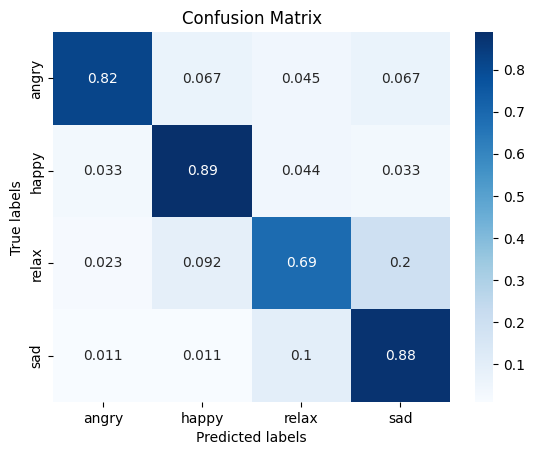

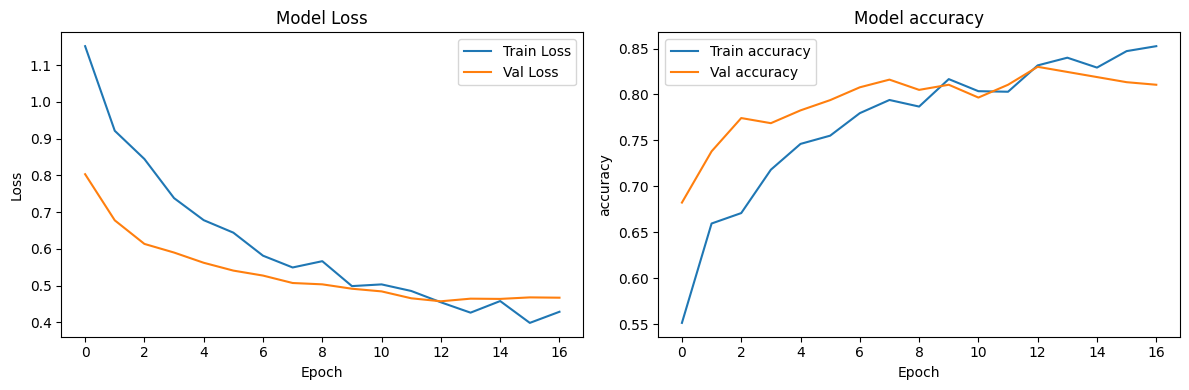

In [9]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [11]:
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(5e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=10,
    batch_size=16,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
    ]
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8234 - loss: 0.4651 - val_accuracy: 0.8301 - val_loss: 0.4660
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.8485 - loss: 0.3941 - val_accuracy: 0.7855 - val_loss: 0.4935
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8570 - loss: 0.3992 - val_accuracy: 0.8329 - val_loss: 0.4611
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.8666 - loss: 0.3810 - val_accuracy: 0.8162 - val_loss: 0.4521
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8921 - loss: 0.3096 - val_accuracy: 0.8078 - val_loss: 0.4519
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8913 - loss: 0.2997 - val_accuracy: 0.8273 - val_loss: 0.4085
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.8817 - loss: 0.3109 - val_accuracy: 0.8189 - val_loss: 0.4171
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.8954 - loss: 0.2924 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step
Accuracy: 0.857
Precision: 0.862
Recall: 0.857
F1-score: 0.856
              precision    recall  f1-score   support

       angry       0.97      0.85      0.91        89
       happy       0.88      0.93      0.90        90
       relax       0.82      0.72      0.77        87
         sad       0.78      0.91      0.84        90

    accuracy                           0.86       356
   macro avg       0.86      0.86      0.86       356
weighted avg       0.86      0.86      0.86       356



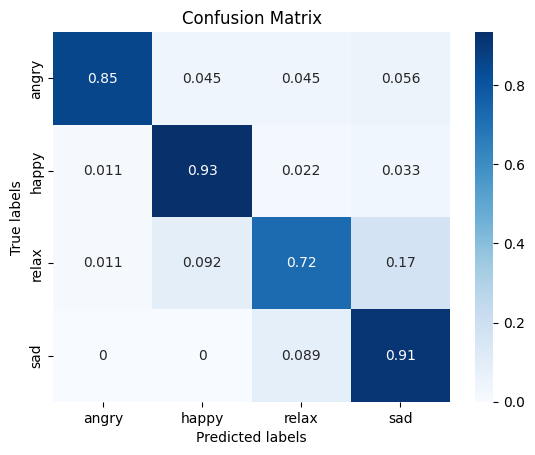

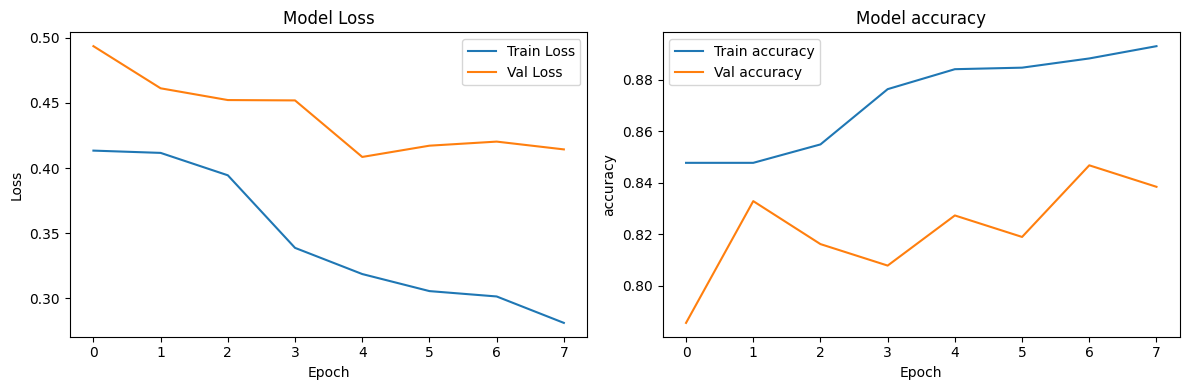

In [12]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

AUGMENTACJA DANYCH

Augmentacja plików audio

In [55]:
train_df, temp_df, _, _ = train_test_split(df_turkish, df_turkish['emotion'], stratify=df_turkish['emotion'], test_size=0.3, random_state=42)
test_df, val_df, _, _ = train_test_split(temp_df, temp_df['emotion'], stratify=temp_df['emotion'], test_size=0.5, random_state=42)

importlib.reload(music_tools)
X_train, y_train, X_test, y_test, X_val, y_val = [], [], [], [], [], []

i = 1
for _, row in train_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments_augment(row['path'], sr=22050, segment_duration=5)
    X_train.extend(specs)
    y_train.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in test_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_test.extend(specs)
    y_test.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in val_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_val.extend(specs)
    y_val.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

le_train = LabelEncoder()
y_train_en = le_train.fit_transform(y_train)
y_train_cnn = to_categorical(y_train_en)

le_test = LabelEncoder()
y_test_en = le_test.fit_transform(y_test)
y_test_cnn = to_categorical(y_test_en)

le_val = LabelEncoder()
y_val_en = le_val.fit_transform(y_val)
y_val_cnn = to_categorical(y_val_en)

X_train_rgb = music_tools.melspectrogram_to_rgb(X_train)
X_train_rgb = preprocess_input(X_train_rgb)

X_test_rgb = music_tools.melspectrogram_to_rgb(X_test)
X_test_rgb = preprocess_input(X_test_rgb)

X_val_rgb = music_tools.melspectrogram_to_rgb(X_val)
X_val_rgb = preprocess_input(X_val_rgb)

1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [24]:
X_train_rgb.shape

(2557, 224, 224, 3)

In [26]:
vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=25,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True),
    ]
)

Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 371s 5s/step - accuracy: 0.3440 - loss: 1.7188 - val_accuracy: 0.5989 - val_loss: 0.9612
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 361s 5s/step - accuracy: 0.5701 - loss: 1.0928 - val_accuracy: 0.7159 - val_loss: 0.7100
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.6715 - loss: 0.8807 - val_accuracy: 0.7577 - val_loss: 0.6229
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.6895 - loss: 0.7748 - val_accuracy: 0.7521 - val_loss: 0.5821
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.7382 - loss: 0.7087 - val_accuracy: 0.7521 - val_loss: 0.5854
Epoch 6/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 336s 4s/step - accuracy: 0.7601 - loss: 0.6339 - val_accuracy: 0.7577 - val_loss: 0.5608
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 384s 5s/step - accuracy: 0.7612 - loss: 0.6092 - val_accuracy: 0.7604 - val_loss: 0.5435
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.7924 - loss: 0.5486 - val_accuracy: 0.7660 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step
Accuracy: 0.837
Precision: 0.838
Recall: 0.837
F1-score: 0.836
              precision    recall  f1-score   support

       angry       0.89      0.85      0.87        89
       happy       0.87      0.91      0.89        90
       relax       0.81      0.71      0.76        87
         sad       0.78      0.87      0.82        90

    accuracy                           0.84       356
   macro avg       0.84      0.84      0.84       356
weighted avg       0.84      0.84      0.84       356



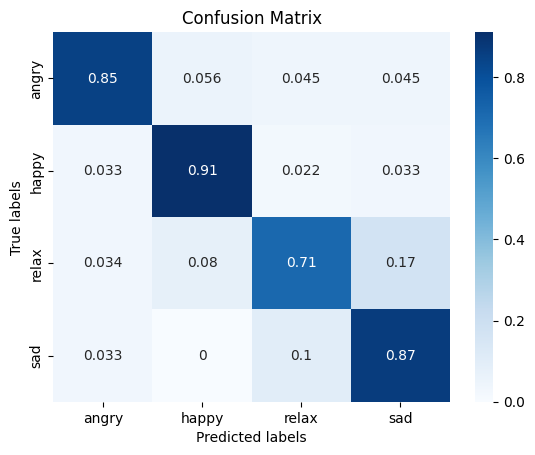

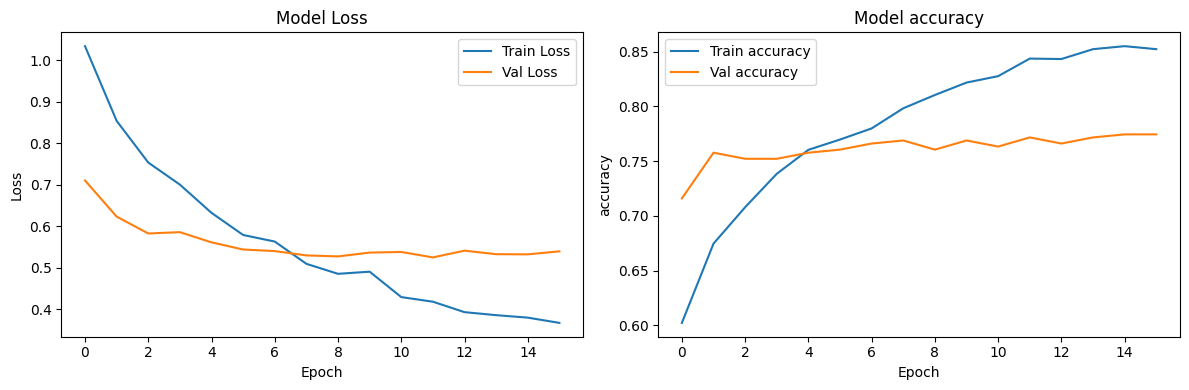

In [27]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [29]:
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=10,
    batch_size=16,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
    ]
)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 534s 3s/step - accuracy: 0.8344 - loss: 0.4472 - val_accuracy: 0.7716 - val_loss: 0.5221
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 459s 3s/step - accuracy: 0.8267 - loss: 0.4434 - val_accuracy: 0.7772 - val_loss: 0.5223
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step - accuracy: 0.8379 - loss: 0.4456 - val_accuracy: 0.7827 - val_loss: 0.5142
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.8171 - loss: 0.4443 - val_accuracy: 0.7799 - val_loss: 0.5154
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 661s 4s/step - accuracy: 0.8422 - loss: 0.3995 - val_accuracy: 0.7744 - val_loss: 0.5076
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 782s 5s/step - accuracy: 0.8573 - loss: 0.3820 - val_accuracy: 0.7799 - val_loss: 0.5085
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 416s 3s/step - accuracy: 0.8583 - loss: 0.3602 - val_accuracy: 0.7799 - val_loss: 0.5088
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.8579 - loss: 0.3822 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step
Accuracy: 0.834
Precision: 0.843
Recall: 0.834
F1-score: 0.833
              precision    recall  f1-score   support

       angry       0.94      0.85      0.89        89
       happy       0.87      0.92      0.90        90
       relax       0.84      0.67      0.74        87
         sad       0.72      0.89      0.80        90

    accuracy                           0.83       356
   macro avg       0.84      0.83      0.83       356
weighted avg       0.84      0.83      0.83       356



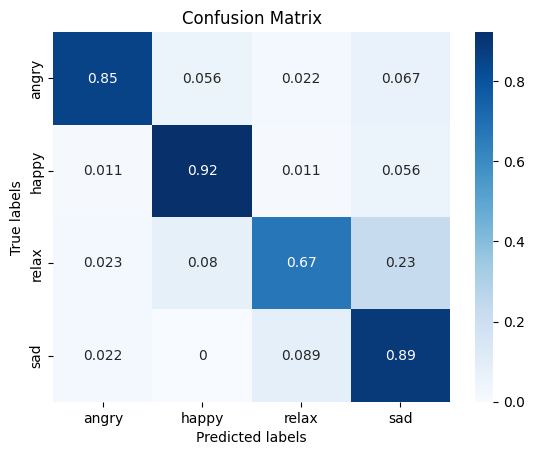

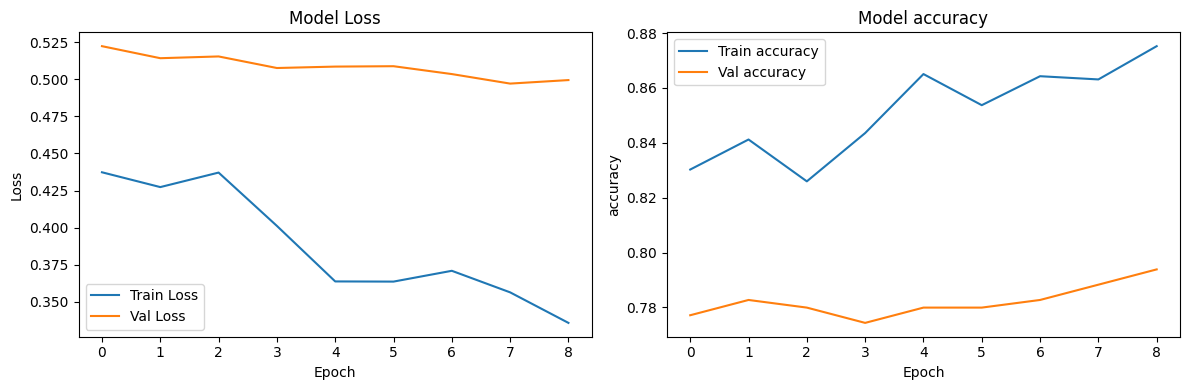

In [30]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

Większa liczba augmentowanych plików

In [71]:
train_df, temp_df, _, _ = train_test_split(df_turkish, df_turkish['emotion'], stratify=df_turkish['emotion'], test_size=0.3, random_state=42)
test_df, val_df, _, _ = train_test_split(temp_df, temp_df['emotion'], stratify=temp_df['emotion'], test_size=0.5, random_state=42)

importlib.reload(music_tools)
X_train, y_train, X_test, y_test, X_val, y_val = [], [], [], [], [], []

i = 1
for _, row in train_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments_augment(row['path'], sr=22050, segment_duration=5, augment_prob=0.7)
    X_train.extend(specs)
    y_train.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in test_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_test.extend(specs)
    y_test.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in val_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_val.extend(specs)
    y_val.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

le_train = LabelEncoder()
y_train_en = le_train.fit_transform(y_train)
y_train_cnn = to_categorical(y_train_en)

le_test = LabelEncoder()
y_test_en = le_test.fit_transform(y_test)
y_test_cnn = to_categorical(y_test_en)

le_val = LabelEncoder()
y_val_en = le_val.fit_transform(y_val)
y_val_cnn = to_categorical(y_val_en)

X_train_rgb = music_tools.melspectrogram_to_rgb(X_train)
X_train_rgb = preprocess_input(X_train_rgb)

X_test_rgb = music_tools.melspectrogram_to_rgb(X_test)
X_test_rgb = preprocess_input(X_test_rgb)

X_val_rgb = music_tools.melspectrogram_to_rgb(X_val)
X_val_rgb = preprocess_input(X_val_rgb)

1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [72]:
X_train_rgb.shape

(2875, 224, 224, 3)

In [73]:
vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=25,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True),
    ]
)

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.3217 - loss: 1.9178 - val_accuracy: 0.6713 - val_loss: 0.8266
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.5902 - loss: 1.0232 - val_accuracy: 0.7911 - val_loss: 0.5790
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.6732 - loss: 0.8700 - val_accuracy: 0.7967 - val_loss: 0.5473
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 386s 4s/step - accuracy: 0.7308 - loss: 0.7170 - val_accuracy: 0.7883 - val_loss: 0.5396
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.7543 - loss: 0.6705 - val_accuracy: 0.7827 - val_loss: 0.5303
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.7760 - loss: 0.5879 - val_accuracy: 0.7939 - val_loss: 0.5306
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.7867 - loss: 0.5998 - val_accuracy: 0.7772 - val_loss: 0.5457
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.7947 - loss: 0.5549 - val_accuracy: 0.7911 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step
Accuracy: 0.829
Precision: 0.830
Recall: 0.829
F1-score: 0.827
              precision    recall  f1-score   support

       angry       0.82      0.91      0.86        89
       happy       0.88      0.88      0.88        90
       relax       0.85      0.71      0.78        87
         sad       0.78      0.81      0.79        90

    accuracy                           0.83       356
   macro avg       0.83      0.83      0.83       356
weighted avg       0.83      0.83      0.83       356



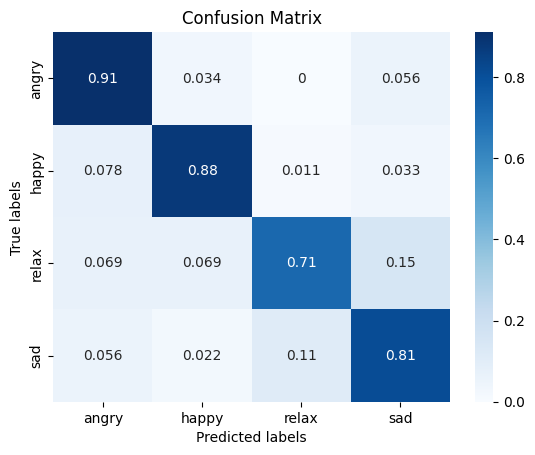

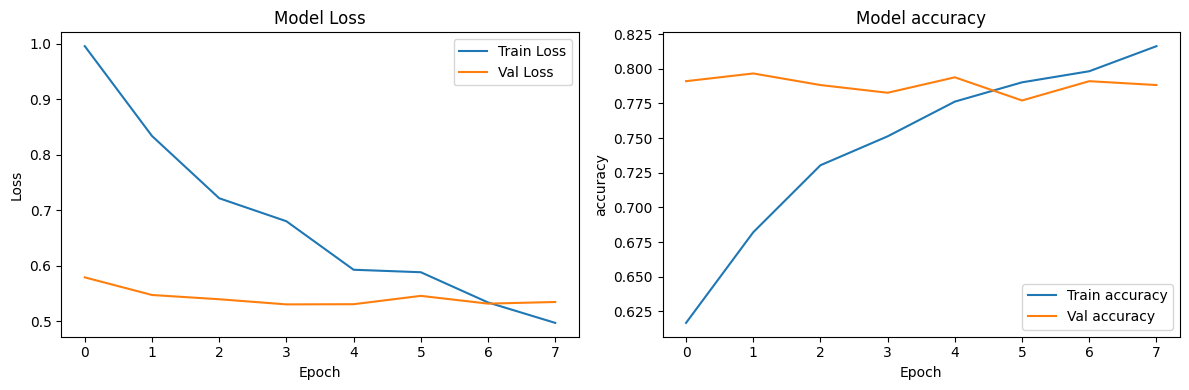

In [74]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [75]:
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=10,
    batch_size=16,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
    ]
)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.7537 - loss: 0.6704 - val_accuracy: 0.7883 - val_loss: 0.5213
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.7718 - loss: 0.6154 - val_accuracy: 0.7883 - val_loss: 0.5218
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.7637 - loss: 0.6173 - val_accuracy: 0.7939 - val_loss: 0.5088
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 451s 3s/step - accuracy: 0.7664 - loss: 0.5839 - val_accuracy: 0.8022 - val_loss: 0.5054
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.7754 - loss: 0.5810 - val_accuracy: 0.8050 - val_loss: 0.5081
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.7856 - loss: 0.5773 - val_accuracy: 0.8022 - val_loss: 0.5088
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.7983 - loss: 0.5371 - val_accuracy: 0.8134 - val_loss: 0.4924
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.7992 - loss: 0.5241 - val_accu

12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step
Accuracy: 0.843
Precision: 0.847
Recall: 0.843
F1-score: 0.841
              precision    recall  f1-score   support

       angry       0.89      0.91      0.90        89
       happy       0.90      0.88      0.89        90
       relax       0.85      0.69      0.76        87
         sad       0.75      0.89      0.82        90

    accuracy                           0.84       356
   macro avg       0.85      0.84      0.84       356
weighted avg       0.85      0.84      0.84       356



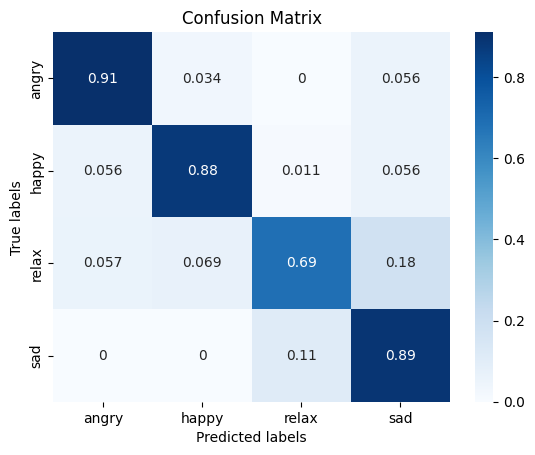

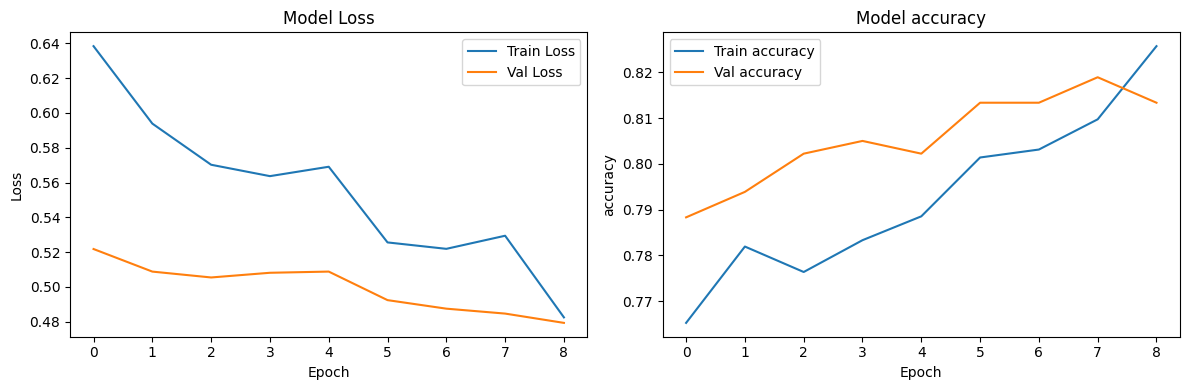

In [76]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

Augmentacja melspektrogramów

In [37]:
train_df, temp_df, _, _ = train_test_split(df_turkish, df_turkish['emotion'], stratify=df_turkish['emotion'], test_size=0.3, random_state=42)
test_df, val_df, _, _ = train_test_split(temp_df, temp_df['emotion'], stratify=temp_df['emotion'], test_size=0.5, random_state=42)

importlib.reload(music_tools)
X_train, y_train, X_test, y_test, X_val, y_val = [], [], [], [], [], []

i = 1
for _, row in train_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_train.extend(specs)
    y_train.extend([row['emotion']] * len(specs))
    (print
     (f'{i} / {len(train_df) + len(test_df) + len(val_df)}'))
    i += 1

for _, row in test_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_test.extend(specs)
    y_test.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

for _, row in val_df.iterrows():
    specs = music_tools.extract_melspectrogram_segments(row['path'], sr=22050, segment_duration=5)
    X_val.extend(specs)
    y_val.extend([row['emotion']] * len(specs))
    print(f'{i} / {len(train_df) + len(test_df) + len(val_df)}')
    i += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

1 / 400
2 / 400
3 / 400
4 / 400
5 / 400
6 / 400
7 / 400
8 / 400
9 / 400
10 / 400
11 / 400
12 / 400
13 / 400
14 / 400
15 / 400
16 / 400
17 / 400
18 / 400
19 / 400
20 / 400
21 / 400
22 / 400
23 / 400
24 / 400
25 / 400
26 / 400
27 / 400
28 / 400
29 / 400
30 / 400
31 / 400
32 / 400
33 / 400
34 / 400
35 / 400
36 / 400
37 / 400
38 / 400
39 / 400
40 / 400
41 / 400
42 / 400
43 / 400
44 / 400
45 / 400
46 / 400
47 / 400
48 / 400
49 / 400
50 / 400
51 / 400
52 / 400
53 / 400
54 / 400
55 / 400
56 / 400
57 / 400
58 / 400
59 / 400
60 / 400
61 / 400
62 / 400
63 / 400
64 / 400
65 / 400
66 / 400
67 / 400
68 / 400
69 / 400
70 / 400
71 / 400
72 / 400
73 / 400
74 / 400
75 / 400
76 / 400
77 / 400
78 / 400
79 / 400
80 / 400
81 / 400
82 / 400
83 / 400
84 / 400
85 / 400
86 / 400
87 / 400
88 / 400
89 / 400
90 / 400
91 / 400
92 / 400
93 / 400
94 / 400
95 / 400
96 / 400
97 / 400
98 / 400
99 / 400
100 / 400
101 / 400
102 / 400
103 / 400
104 / 400
105 / 400
106 / 400
107 / 400
108 / 400
109 / 400
110 / 400
111 / 40

In [42]:
import tensorflow as tf

def spec_augment(mel):
    # mel: (B, F, T, C)
    mel = tf.cast(mel, tf.float32)
    B, F, T, C = tf.shape(mel)[0], tf.shape(mel)[1], tf.shape(mel)[2], tf.shape(mel)[3]

    # --- TIME MASK ---
    t_width = tf.random.uniform([], minval=5, maxval=20, dtype=tf.int32)
    t0 = tf.random.uniform([], minval=0, maxval=T - t_width, dtype=tf.int32)
    time_mask = tf.concat([
        tf.ones((B, F, t0, C)),
        tf.zeros((B, F, t_width, C)),
        tf.ones((B, F, T - t0 - t_width, C))
    ], axis=2)
    mel = mel * time_mask

    # --- FREQUENCY MASK ---
    f_width = tf.random.uniform([], minval=5, maxval=20, dtype=tf.int32)
    f0 = tf.random.uniform([], minval=0, maxval=F - f_width, dtype=tf.int32)
    freq_mask = tf.concat([
        tf.ones((B, f0, T, C)),
        tf.zeros((B, f_width, T, C)),
        tf.ones((B, F - f0 - f_width, T, C))
    ], axis=1)
    mel = mel * freq_mask

    return mel

class SpecAugmentLayer(Layer):
    def call(self, inputs, training=None):
        if training:
            return spec_augment(inputs)
        return inputs


In [43]:
vgg_model  = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
for layer in vgg_model.layers:
    layer.trainable = False

inputs = Input(shape=(224, 224, 3))
aug = SpecAugmentLayer()(inputs)
x = vgg_model(aug, training=False)

x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(y_train_cnn.shape[1], activation='softmax')(x)

model = Model(inputs, output)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=25,
    batch_size=32,
    callbacks=[
        EarlyStopping(patience=4, restore_best_weights=True),
    ]
)

Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 688s 9s/step - accuracy: 0.3531 - loss: 1.7346 - val_accuracy: 0.5376 - val_loss: 1.2513
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 488s 6s/step - accuracy: 0.5329 - loss: 1.2021 - val_accuracy: 0.6407 - val_loss: 0.9451
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.6243 - loss: 0.9813 - val_accuracy: 0.6908 - val_loss: 0.8537
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step - accuracy: 0.6410 - loss: 0.9430 - val_accuracy: 0.7019 - val_loss: 0.7944
Epoch 5/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 349s 4s/step - accuracy: 0.6884 - loss: 0.8535 - val_accuracy: 0.7187 - val_loss: 0.7845
Epoch 6/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.6979 - loss: 0.8489 - val_accuracy: 0.7131 - val_loss: 0.7528
Epoch 7/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 349s 4s/step - accuracy: 0.7158 - loss: 0.7910 - val_accuracy: 0.7214 - val_loss: 0.7729
Epoch 8/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.7383 - loss: 0.7000 - val_accuracy: 0.7270 - v

12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step
Accuracy: 0.753
Precision: 0.813
Recall: 0.753
F1-score: 0.739
              precision    recall  f1-score   support

       angry       0.94      0.72      0.82        89
       happy       0.77      0.94      0.85        90
       relax       0.94      0.39      0.55        87
         sad       0.60      0.94      0.73        90

    accuracy                           0.75       356
   macro avg       0.81      0.75      0.74       356
weighted avg       0.81      0.75      0.74       356



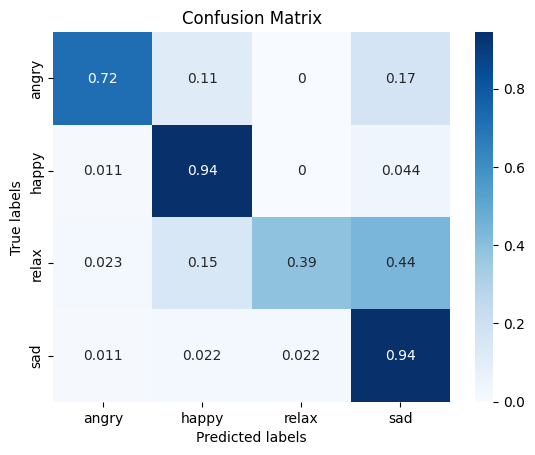

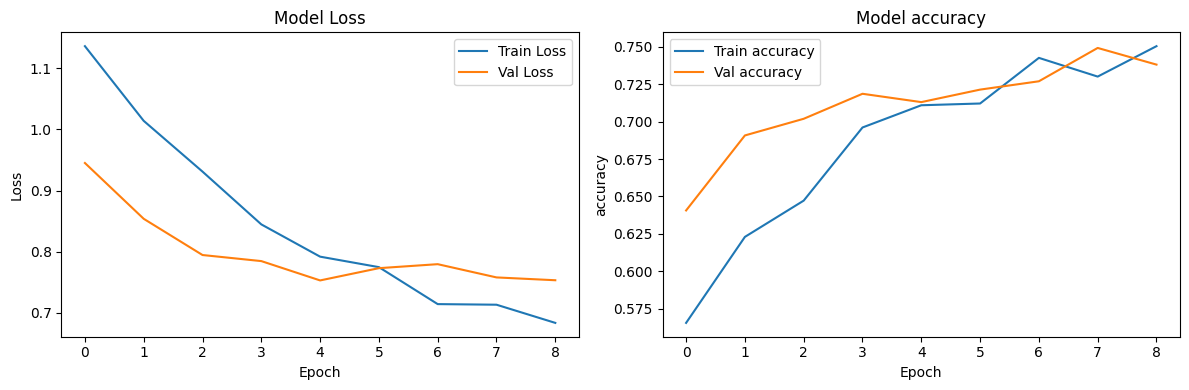

In [44]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)

In [45]:
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_rgb, y_train_cnn,
    validation_data=(X_val_rgb, y_val_cnn),
    epochs=10,
    batch_size=16,
    callbacks=[
        EarlyStopping(patience=3, restore_best_weights=True),
    ]
)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 405s 3s/step - accuracy: 0.7202 - loss: 0.7735 - val_accuracy: 0.7242 - val_loss: 0.7576
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 402s 3s/step - accuracy: 0.7172 - loss: 0.7969 - val_accuracy: 0.7075 - val_loss: 0.8053
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.7393 - loss: 0.7167 - val_accuracy: 0.7187 - val_loss: 0.7738
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - accuracy: 0.7319 - loss: 0.7304 - val_accuracy: 0.7103 - val_loss: 0.7932


12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step
Accuracy: 0.775
Precision: 0.826
Recall: 0.775
F1-score: 0.761
              precision    recall  f1-score   support

       angry       0.94      0.81      0.87        89
       happy       0.82      0.94      0.88        90
       relax       0.94      0.39      0.55        87
         sad       0.61      0.94      0.74        90

    accuracy                           0.78       356
   macro avg       0.83      0.77      0.76       356
weighted avg       0.83      0.78      0.76       356



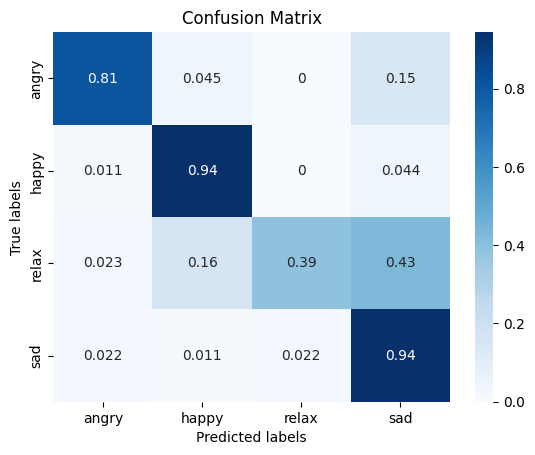

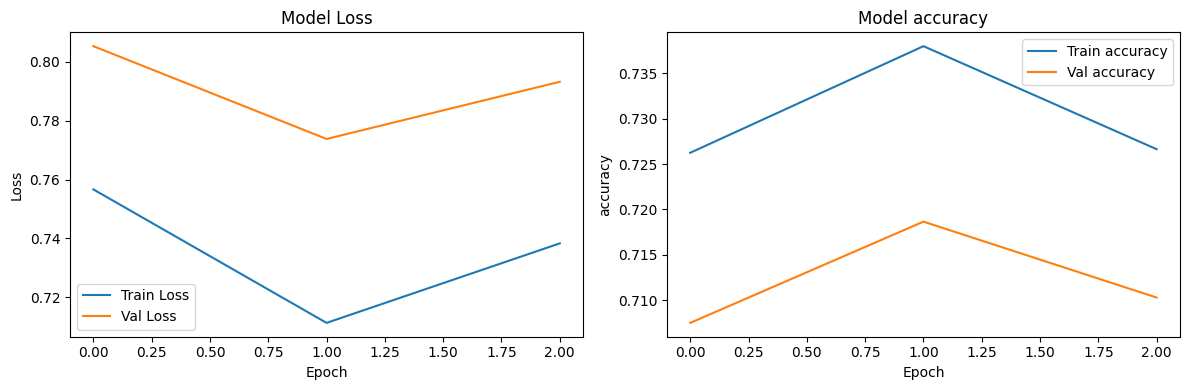

In [46]:
y_pred = model.predict(X_test_rgb)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cnn, axis=1)

music_tools.show_classification_results(y_pred_labels, y_true_labels, le_test)
music_tools.plot_trainig_history(history)